# Oak Wilt Visualization

## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
import imageio
import os
import json
import re
from datetime import datetime

# Configuration
CSV_FILE = "../data/data_cleaned.csv"
OUTPUT_DIR = "../visualizations"
os.makedirs(OUTPUT_DIR, exist_ok=True)

print("✓ Libraries imported successfully!")
print(f"✓ Output directory: {OUTPUT_DIR}")

✓ Libraries imported successfully!
✓ Output directory: ../visualizations


## 2. Load and Clean Data

In [2]:
print("Loading data...")
df = pd.read_csv(CSV_FILE)

# Replace <Null> with NaN
df = df.replace('<Null>', np.nan)

# Convert date column
df['INSPECTION_DATE'] = pd.to_datetime(df['INSPECTION_DATE'], format='%m/%d/%y', errors='coerce')

# Convert coordinates to numeric
df['LATITUDE'] = pd.to_numeric(df['LATITUDE'], errors='coerce')
df['LONGITUDE'] = pd.to_numeric(df['LONGITUDE'], errors='coerce')

# Remove rows with missing coordinates
df = df.dropna(subset=['LATITUDE', 'LONGITUDE'])

# Filter for confirmed oak wilt cases
df_confirmed = df[df['OAK_WILT_CONFIRMED'] == 'Yes'].copy()

print(f"✓ Total inspections: {len(df):,}")
print(f"✓ Confirmed oak wilt cases: {len(df_confirmed):,}")
print(f"✓ Date range: {df_confirmed['INSPECTION_DATE'].min()} to {df_confirmed['INSPECTION_DATE'].max()}")

# Display first few rows
df_confirmed.head()

Loading data...
✓ Total inspections: 1,682
✓ Confirmed oak wilt cases: 1,672
✓ Date range: 1986-08-24 00:00:00 to 2024-10-04 00:00:00


,Inspection_ID (unique),MORTALITY_CENTER_ID,INSPECTION_DATE,INSPECTION_DECADE,INSPECTION_YEAR,SPECIES,LATITUDE,LONGITUDE,LANDOWNER_TYPE,OAK_WILT_CONFIRMED,SYMPTOM_VEINAL_NECROSIS,SYMPTOM_MORTALITY_PATTERN
0,NaN,5758.0,1986-08-24,1980s,1986,Live Oak,30.318636,-97.766907,Unknown,Yes,NaN,NaN
1,NaN,5723.0,1987-03-11,1980s,1987,Live Oak,30.263226,-97.804992,Unknown,Yes,Yes,NaN
2,NaN,5782.0,1988-03-17,1980s,1988,Live Oak,30.247574,-97.759786,Unknown,Yes,NaN,NaN
3,NaN,5807.0,1988-05-06,1980s,1988,Live Oak,30.229521,-97.859917,Unknown,Yes,Yes,NaN
4,NaN,5689.0,1988-12-06,1980s,1988,Live Oak,30.388368,-97.687027,Unknown,Yes,Yes,NaN


## 3. Create Basic Scatter Plot

A static visualization showing all oak wilt cases color-coded by year.

Creating basic scatter plot...
✓ Saved: ../visualizations/oak_wilt_all_cases.png


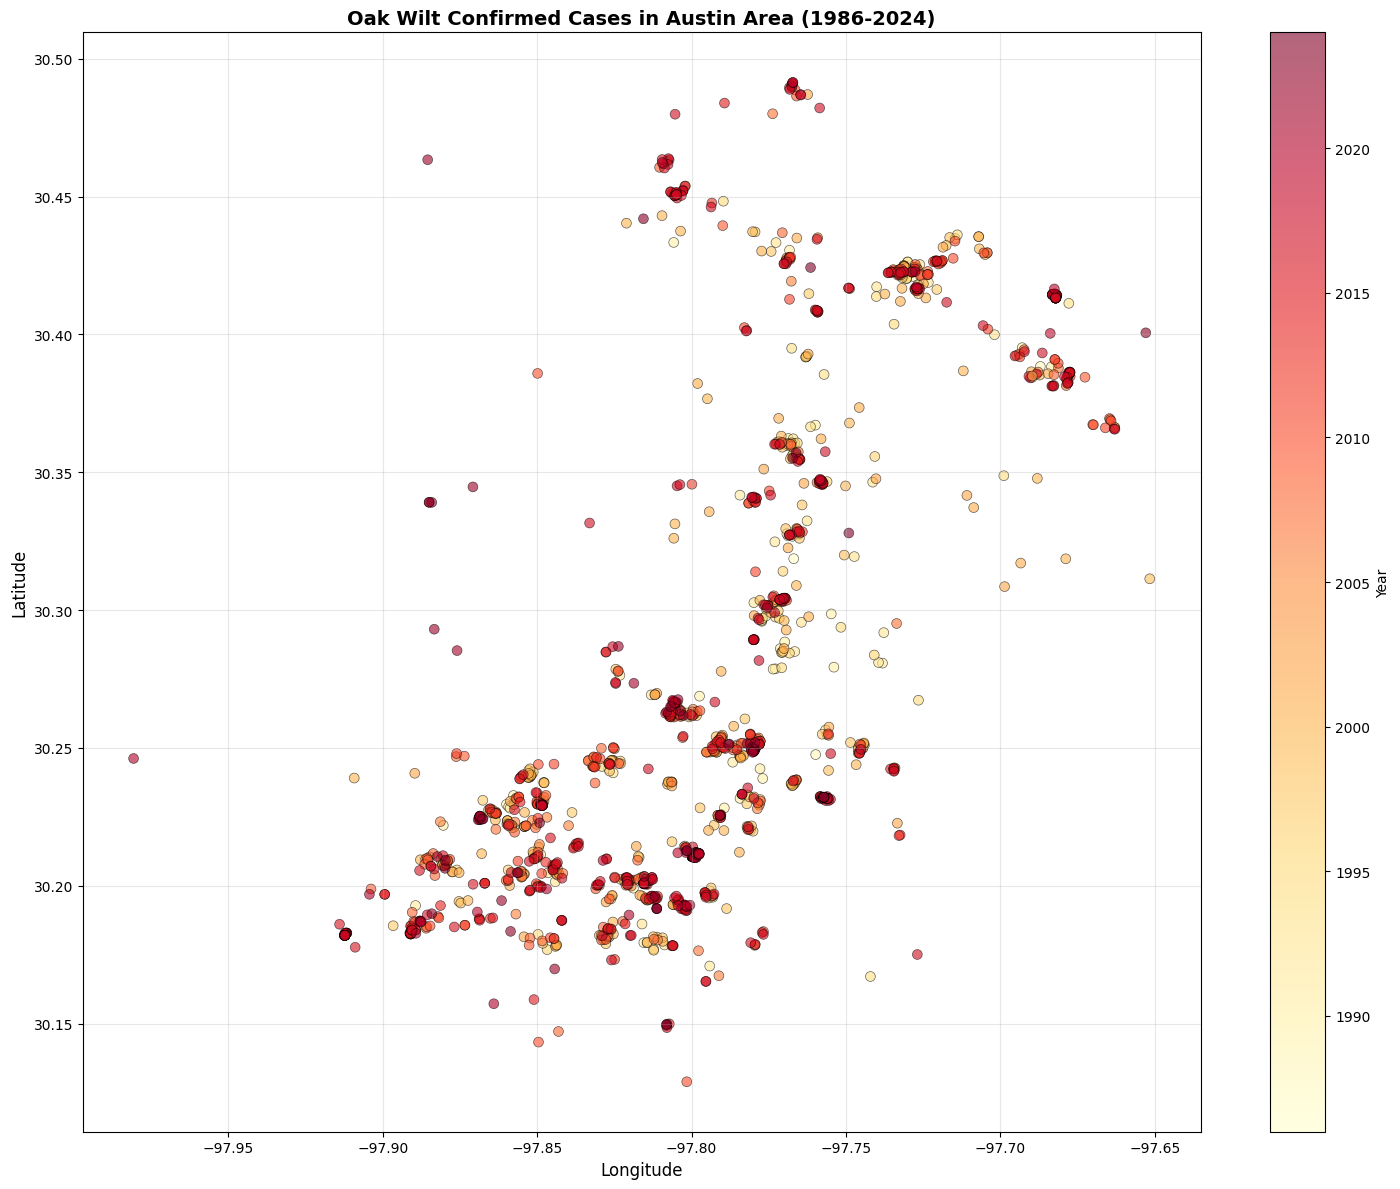

In [3]:
print("Creating basic scatter plot...")

fig, ax = plt.subplots(figsize=(15, 12))

scatter = ax.scatter(
    df_confirmed['LONGITUDE'], 
    df_confirmed['LATITUDE'],
    c=df_confirmed['INSPECTION_YEAR'],
    cmap='YlOrRd',
    alpha=0.6,
    s=50,
    edgecolors='black',
    linewidth=0.5
)

plt.colorbar(scatter, ax=ax, label='Year')
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)
ax.set_title('Oak Wilt Confirmed Cases in Austin Area (1986-2024)', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(f'{OUTPUT_DIR}/oak_wilt_all_cases.png', dpi=300, bbox_inches='tight')
print(f"✓ Saved: {OUTPUT_DIR}/oak_wilt_all_cases.png")
plt.show()

## 4. Create Yearly Maps

Individual maps for each year showing cumulative spread (gray) and new cases (red).

In [4]:
print("Creating yearly maps...")

years = sorted(df_confirmed['INSPECTION_YEAR'].dropna().unique())
print(f"Processing {len(years)} years: {int(years[0])} to {int(years[-1])}")

for year in years:
    year_data = df_confirmed[df_confirmed['INSPECTION_YEAR'] == year]
    
    if len(year_data) == 0:
        continue
        
    fig, ax = plt.subplots(figsize=(15, 12))
    
    # Plot all previous years in gray
    previous_data = df_confirmed[df_confirmed['INSPECTION_YEAR'] < year]
    if len(previous_data) > 0:
        ax.scatter(
            previous_data['LONGITUDE'],
            previous_data['LATITUDE'],
            c='lightgray',
            alpha=0.3,
            s=30,
            label='Previous years'
        )
    
    # Plot current year in red
    ax.scatter(
        year_data['LONGITUDE'],
        year_data['LATITUDE'],
        c='red',
        alpha=0.8,
        s=100,
        edgecolors='black',
        linewidth=1,
        label=f'{int(year)}'
    )
    
    ax.set_xlabel('Longitude', fontsize=12)
    ax.set_ylabel('Latitude', fontsize=12)
    ax.set_title(f'Oak Wilt Spread - Year {int(year)} ({len(year_data)} new cases)', 
                 fontsize=14, fontweight='bold')
    ax.legend(loc='upper right')
    ax.grid(True, alpha=0.3)
    
    # Keep consistent axes limits
    ax.set_xlim(df_confirmed['LONGITUDE'].min() - 0.01, df_confirmed['LONGITUDE'].max() + 0.01)
    ax.set_ylim(df_confirmed['LATITUDE'].min() - 0.01, df_confirmed['LATITUDE'].max() + 0.01)
    
    plt.tight_layout()
    plt.savefig(f'{OUTPUT_DIR}/oak_wilt_{int(year)}.png', dpi=150, bbox_inches='tight')
    plt.close()
    
    print(f"  ✓ Created map for year {int(year)}")

print(f"\n✓ All yearly maps saved to {OUTPUT_DIR}/")

Creating yearly maps...
Processing 37 years: 1986 to 2024
  ✓ Created map for year 1986
  ✓ Created map for year 1987
  ✓ Created map for year 1988
  ✓ Created map for year 1989
  ✓ Created map for year 1990
  ✓ Created map for year 1991
  ✓ Created map for year 1992
  ✓ Created map for year 1993
  ✓ Created map for year 1994
  ✓ Created map for year 1995
  ✓ Created map for year 1996
  ✓ Created map for year 1997
  ✓ Created map for year 1998
  ✓ Created map for year 1999
  ✓ Created map for year 2000
  ✓ Created map for year 2001
  ✓ Created map for year 2002
  ✓ Created map for year 2005
  ✓ Created map for year 2006
  ✓ Created map for year 2007
  ✓ Created map for year 2008
  ✓ Created map for year 2009
  ✓ Created map for year 2010
  ✓ Created map for year 2011
  ✓ Created map for year 2012
  ✓ Created map for year 2013
  ✓ Created map for year 2014
  ✓ Created map for year 2015
  ✓ Created map for year 2016
  ✓ Created map for year 2017
  ✓ Created map for year 2018
  ✓ Created 

## 5. Create Animated GIF

Combines all yearly maps into an animated GIF time-lapse.

In [5]:
print("Creating animated GIF...")

years = sorted(df_confirmed['INSPECTION_YEAR'].dropna().unique())
images = []

for year in years:
    filename = f'{OUTPUT_DIR}/oak_wilt_{int(year)}.png'
    if os.path.exists(filename):
        images.append(imageio.imread(filename))

if images:
    # Save as GIF
    imageio.mimsave(
        f'{OUTPUT_DIR}/oak_wilt_timelapse.gif',
        images,
        duration=0.5,  # 0.5 seconds per frame
        loop=0
    )
    print(f"✓ Saved: {OUTPUT_DIR}/oak_wilt_timelapse.gif")
    print(f"  - {len(images)} frames")
    print(f"  - 0.5 seconds per frame")
else:
    print("⚠ No images found to create GIF")

Creating animated GIF...


/var/folders/_m/wwv7fh496gl5yw86qr76p7800000gn/T/ipykernel_57283/1427867881.py:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


✓ Saved: ../visualizations/oak_wilt_timelapse.gif
  - 37 frames
  - 0.5 seconds per frame


## 6. Create Interactive Map

Interactive Folium map with clickable markers showing details of each inspection.

In [6]:
print("Creating interactive map...")

# Calculate center of map
center_lat = df_confirmed['LATITUDE'].mean()
center_lon = df_confirmed['LONGITUDE'].mean()

# Create base map
m = folium.Map(
    location=[center_lat, center_lon],
    zoom_start=11,
    tiles='OpenStreetMap'
)

# Add a satellite layer option
folium.TileLayer(
    tiles='https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
    attr='Esri',
    name='Esri Satellite',
    overlay=False,
    control=True
).add_to(m)

# Color mapping for decades
decade_colors = {
    '1980s': 'blue',
    '1990s': 'green',
    '2000s': 'orange',
    '2010s': 'red',
    '2020s': 'purple'
}

# Add markers for each confirmed case
print(f"Adding {len(df_confirmed)} markers...")
for idx, row in df_confirmed.iterrows():
    color = decade_colors.get(row['INSPECTION_DECADE'], 'gray')
    
    popup_text = f"""
    <b>Inspection Date:</b> {row['INSPECTION_DATE'].strftime('%Y-%m-%d') if pd.notna(row['INSPECTION_DATE']) else 'Unknown'}<br>
    <b>Species:</b> {row['SPECIES'] if pd.notna(row['SPECIES']) else 'Unknown'}<br>
    <b>Year:</b> {row['INSPECTION_YEAR']}<br>
    <b>Location:</b> ({row['LATITUDE']:.4f}, {row['LONGITUDE']:.4f})
    """
    
    folium.CircleMarker(
        location=[row['LATITUDE'], row['LONGITUDE']],
        radius=5,
        popup=folium.Popup(popup_text, max_width=300),
        color=color,
        fill=True,
        fillColor=color,
        fillOpacity=0.6
    ).add_to(m)

# Add layer control
folium.LayerControl().add_to(m)

# Save map
m.save(f'{OUTPUT_DIR}/oak_wilt_interactive_map.html')
print(f"✓ Saved: {OUTPUT_DIR}/oak_wilt_interactive_map.html")

# Display in notebook
m

Creating interactive map...
Adding 1672 markers...
✓ Saved: ../visualizations/oak_wilt_interactive_map.html


## 7. Create Animated Heatmap Time-lapse

Interactive animated map with play/pause controls and year display.

In [7]:
print("Creating interactive animated map with time animation...")

# Calculate center
center_lat = df_confirmed['LATITUDE'].mean()
center_lon = df_confirmed['LONGITUDE'].mean()

# Create base map with proper Esri satellite imagery
m = folium.Map(
    location=[center_lat, center_lon],
    zoom_start=11,
    tiles=None
)

# Add Esri World Imagery (true satellite) as the default base layer
folium.TileLayer(
    tiles='https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
    attr='Esri',
    name='Satellite',
    overlay=False,
    control=True
).add_to(m)

# Add OpenStreetMap as optional layer
folium.TileLayer('OpenStreetMap', name='Street Map', overlay=False, control=True).add_to(m)

# Prepare data by year
years = sorted(df_confirmed['INSPECTION_YEAR'].dropna().unique())
print(f"Processing {len(years)} years of data...")

# Prepare year data as Python dictionaries
year_data_dict = {}
for year in years:
    year_data = df_confirmed[df_confirmed['INSPECTION_YEAR'] == year]
    cumulative_data = df_confirmed[df_confirmed['INSPECTION_YEAR'] <= year]
    
    year_data_dict[int(year)] = {
        'current': [
            {
                'lat': float(row['LATITUDE']),
                'lon': float(row['LONGITUDE']),
                'species': str(row['SPECIES']) if pd.notna(row['SPECIES']) else 'Unknown',
                'date': row['INSPECTION_DATE'].strftime('%Y-%m-%d') if pd.notna(row['INSPECTION_DATE']) else 'Unknown'
            }
            for _, row in year_data.iterrows()
        ],
        'previous': [
            {
                'lat': float(row['LATITUDE']),
                'lon': float(row['LONGITUDE'])
            }
            for _, row in cumulative_data[cumulative_data['INSPECTION_YEAR'] < year].iterrows()
        ]
    }

# Convert to JSON string for JavaScript
year_data_json = json.dumps(year_data_dict)
years_json = json.dumps([int(y) for y in years])

# Add layer control first
folium.LayerControl().add_to(m)

# Save the map first to get its name
temp_file = f'{OUTPUT_DIR}/oak_wilt_heatmap_timelapse.html'
m.save(temp_file)

# Read the saved HTML
with open(temp_file, 'r', encoding='utf-8') as f:
    html_content = f.read()

# Find the map variable name from the HTML
map_match = re.search(r'var (map_[a-f0-9]+) = L\.map', html_content)
if map_match:
    map_name = map_match.group(1)
else:
    map_name = 'map'

print(f"Map variable name: {map_name}")

# Create HTML with UI elements and JavaScript
full_html = f'''
<div id="year-display" style="position: fixed; top: 10px; left: 50%; transform: translateX(-50%); z-index: 9999; background: rgba(0, 0, 0, 0.8); color: white; padding: 15px 30px; border-radius: 10px; font-family: Arial, sans-serif; font-size: 24px; font-weight: bold; box-shadow: 0 4px 6px rgba(0,0,0,0.3);">
    Year: <span id="current-year">1986</span>
    <br>
    <span style="font-size: 14px; font-weight: normal;">
        Cases: <span id="case-count">0</span>
    </span>
</div>

<div id="animation-controls" style="position: fixed; bottom: 20px; left: 50%; transform: translateX(-50%); z-index: 9999; background: rgba(255, 255, 255, 0.95); padding: 10px 20px; border-radius: 8px; box-shadow: 0 4px 6px rgba(0,0,0,0.3);">
    <button id="play-pause-btn" style="padding: 8px 20px; font-size: 16px; background: #4CAF50; color: white; border: none; border-radius: 5px; cursor: pointer; margin-right: 10px;">Pause</button>
    <button id="restart-btn" style="padding: 8px 20px; font-size: 16px; background: #2196F3; color: white; border: none; border-radius: 5px; cursor: pointer;">Restart</button>
</div>

<script>
var yearData = {year_data_json};
var years = {years_json};
var currentYearIndex = 0;
var isPlaying = true;
var previousMarkers = [];
var currentMarkers = [];

function clearMarkers() {{
    previousMarkers.forEach(marker => marker.remove());
    currentMarkers.forEach(marker => marker.remove());
    previousMarkers = [];
    currentMarkers = [];
}}

function showYear(yearIndex) {{
    clearMarkers();
    var year = years[yearIndex];
    var data = yearData[year];
    
    document.getElementById('current-year').textContent = year;
    document.getElementById('case-count').textContent = data.current.length;
    
    data.previous.forEach(point => {{
        var marker = L.circleMarker([point.lat, point.lon], {{
            radius: 5,
            fillColor: '#888888',
            color: '#666666',
            weight: 1,
            opacity: 0.6,
            fillOpacity: 0.4
        }}).addTo({map_name});
        previousMarkers.push(marker);
    }});
    
    data.current.forEach(point => {{
        var marker = L.circleMarker([point.lat, point.lon], {{
            radius: 8,
            fillColor: '#ff0000',
            color: '#8B0000',
            weight: 2,
            opacity: 1,
            fillOpacity: 0.8
        }}).addTo({map_name});
        
        marker.bindPopup('<b>Year:</b> ' + year + '<br><b>Species:</b> ' + point.species + '<br><b>Date:</b> ' + point.date);
        currentMarkers.push(marker);
    }});
}}

function nextYear() {{
    currentYearIndex = (currentYearIndex + 1) % years.length;
    showYear(currentYearIndex);
}}

function togglePlayPause() {{
    isPlaying = !isPlaying;
    document.getElementById('play-pause-btn').textContent = isPlaying ? 'Pause' : 'Play';
    document.getElementById('play-pause-btn').style.background = isPlaying ? '#4CAF50' : '#FF9800';
}}

function restart() {{
    currentYearIndex = 0;
    showYear(currentYearIndex);
    if (!isPlaying) togglePlayPause();
}}

document.getElementById('play-pause-btn').addEventListener('click', togglePlayPause);
document.getElementById('restart-btn').addEventListener('click', restart);

setInterval(function() {{
    if (isPlaying) {{
        nextYear();
    }}
}}, 1500);

showYear(0);
</script>
'''

# Insert the HTML before the closing body tag
html_content = html_content.replace('</body>', full_html + '</body>')

# Write the modified HTML back
with open(temp_file, 'w', encoding='utf-8') as f:
    f.write(html_content)

print(f"✓ Saved: {OUTPUT_DIR}/oak_wilt_heatmap_timelapse.html")
print(f"  - Auto-play animation with 1.5s intervals")
print(f"  - Play/Pause and Restart controls")
print(f"  - Year and case count display")

Creating interactive animated map with time animation...
Processing 37 years of data...
Map variable name: map_a8ecae7600cf903e661526caaf741669
✓ Saved: ../visualizations/oak_wilt_heatmap_timelapse.html
  - Auto-play animation with 1.5s intervals
  - Play/Pause and Restart controls
  - Year and case count display


## 8. Summary

All visualizations have been generated and saved to the `../visualizations/` directory.

In [8]:
print("="*60)
print("VISUALIZATION COMPLETE!")
print("="*60)
print(f"\nAll outputs saved to: {OUTPUT_DIR}/")
print("\nGenerated files:")
print("  1. oak_wilt_all_cases.png - Static scatter plot")
print(f"  2. oak_wilt_YYYY.png - {len(years)} yearly progression maps")
print("  3. oak_wilt_timelapse.gif - Animated GIF time-lapse")
print("  4. oak_wilt_interactive_map.html - Interactive clickable map")
print("  5. oak_wilt_heatmap_timelapse.html - Animated heatmap with controls")
print("\n" + "="*60)
print(f"Total confirmed oak wilt cases visualized: {len(df_confirmed):,}")
print(f"Years covered: {int(years[0])} - {int(years[-1])} ({len(years)} years)")
print("="*60)

VISUALIZATION COMPLETE!

All outputs saved to: ../visualizations/

Generated files:
  1. oak_wilt_all_cases.png - Static scatter plot
  2. oak_wilt_YYYY.png - 37 yearly progression maps
  3. oak_wilt_timelapse.gif - Animated GIF time-lapse
  4. oak_wilt_interactive_map.html - Interactive clickable map
  5. oak_wilt_heatmap_timelapse.html - Animated heatmap with controls

Total confirmed oak wilt cases visualized: 1,672
Years covered: 1986 - 2024 (37 years)
